# Classificação de Penguins com KNN

### Primeiramente, estarei importando algumas bibliotecas usadas na classificação

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np

### Análise Exploratória

Após isso, vou fazer a análise exploratória do banco de dados, retirando insights e analisando como os dados estão organizados. Também fiz um agrupamento pela espécie para perceber quais os valores que mais se diferenciavam entre elas.

In [ ]:
df = pd.read_csv('data\palmerpenguins_original.csv')
df.dropna(inplace=True)     #removendo Dados Nulos
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


In [5]:
df.sex.value_counts()

sex
male      168
female    165
Name: count, dtype: int64

In [6]:
df.replace({'male' : 1, 'female':2}, inplace=True)
df.head()

C:\Users\julin\AppData\Local\Temp\ipykernel_7480\1722138178.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'male' : 1, 'female':2}, inplace=True)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,2,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,2,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,2,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1,2007


In [7]:
df_agrupado = pd.DataFrame(df.groupby(['species'])[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'year']].mean())
df_agrupado

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
species,,,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384,1.500000,2008.054795
Chinstrap,48.833824,18.420588,195.823529,3733.088235,1.500000,2007.970588
Gentoo,47.568067,14.996639,217.235294,5092.436975,1.487395,2008.067227


In [8]:
px.scatter(df, x=df['body_mass_g'], y=df['bill_length_mm'], color=df['species'])

> ### Após analisar com a ajuda de um gráfico quais os valores que mais se diferenciavam entre as espécies, acabei escolhendo usar os dados das colunas 'bill_lenght_mm' (tamanho do bico em milímetros) e 'body_mass_g' (massa do corpo em gramas).

## Aplicação dos Modelos

### KNN com Cross-Validation

Para a primeira amostragem, estarei usando a técnica de Cross Validation (Validação Cruzada), onde o DataFrame é dividido em Folds para que o modelo de KNN treine e teste a cada iteração com as Folds

In [9]:
#Separando colunas de amostragem e classificação
x = df[['bill_length_mm', 'body_mass_g']]
y = df['species']

In [10]:
#aplicando o cross validation e o KNN
knn_cross = KNeighborsClassifier(n_neighbors=1)   #inserindo as métricas do KNN
y_pred = cross_val_predict(knn_cross, x, y, cv=10)    #aplicando o KNN a o Cross Validation

matriz_confusao_crossvalidation = confusion_matrix(y, y_pred)     #A diagonal representa o que está correto
matriz_confusao_crossvalidation

array([[125,   8,  13],
       [ 10,  51,   7],
       [  9,   3, 107]], dtype=int64)

<Axes: >

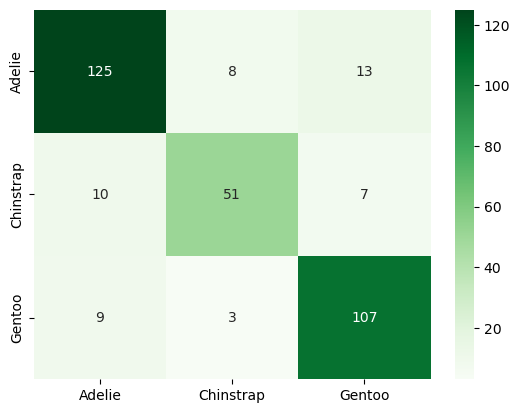

In [11]:
#Configuração de Gráfico
lbl1_cross = ['Adelie', 'Chinstrap', 'Gentoo']
lbl2_cross = ['Adelie', 'Chinstrap', 'Gentoo']
sns.heatmap(matriz_confusao_crossvalidation, annot=True, fmt='d', cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)     #annot=True -> Mostra os números, fmt='d' -> mostra os números direito e não 1+e, cmap='Greens' -> Muda a cor

> ### Fizemos um gráfico apartir da matriz de confusão do modelo, podemos perceber que o modelo errou muitas predições a respeito da espécie Chinstrap levando em consideração o total de amostras da espécie (comparada a Adelie, por exemplo, que tem 146 amostras, contra 68 da Chinstrap).

In [12]:
#Configuração da Matriz de Confusão de Métricas
report = classification_report(y, y_pred, output_dict=True)     #Converte a matriz de confusão em um dicionário
df_report = pd.DataFrame(report)    #Converte em um Dataframe para melhor visualização
df_report

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.868056,0.822581,0.842520,0.84985,0.844385,0.849644
recall,0.856164,0.750000,0.899160,0.84985,0.835108,0.849850
f1-score,0.862069,0.784615,0.869919,0.84985,0.838868,0.849058
support,146.000000,68.000000,119.000000,0.84985,333.000000,333.000000


In [13]:
accuracy_score(y, y_pred)*100

84.98498498498499

> ### A acurácia geral do modelo é 79%. Com certeza a precisão de acerto sobre a espécie Gentoo é um impediditivo para uma acurácia maior.

### KNN com Houldout

Agora, iremos fazer a classificação usando uma técnica de amostragem diferente, usaremos o Houldout. Essa técnica divide o DataFrame aleatoriamente em duas partes, uma porcentagem para treino e outra para teste. Neste caso, estarei utilizando 30% do Dataframe para teste.

In [14]:
#Distribuindo ás variaveis os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=28)       #30% dos dados serão destinados a testes e a matriz de aleatoriedade é 28

In [15]:
knn_houldout = KNeighborsClassifier(n_neighbors=1)
knn_houldout.fit(x_train, y_train)      #treinando o KNN

KNeighborsClassifier(n_neighbors=1)

In [16]:
y_pred_houldout = knn_houldout.predict(x_test)      #fazendo a classificação após o modelo ser treinado com o dados de treino X

Embora não esteja explicitamente no seu código de Cross-validation, o treinamento (fit()) ocorre dentro da função cross_val_predict(). A diferença é que a função cross_val_predict() automatiza o processo, enquanto no Holdout você gerencia manualmente as etapas de treinamento e predição. A função cross_val_score() também funciona de forma semelhante, realizando o treinamento e retornando os scores da validação cruzada.

In [17]:
#Acurácia
acuracia = accuracy_score(y_test, y_pred_houldout)      #Medindo a acurácia
acuracia

0.86

<Axes: >

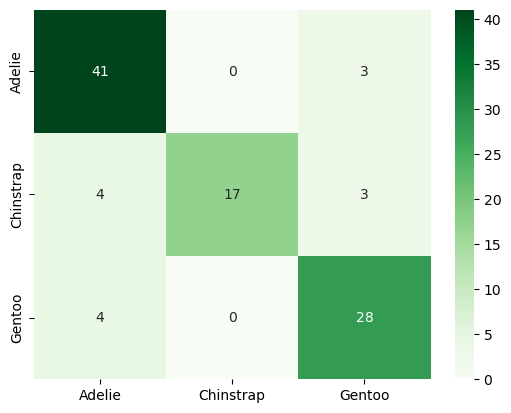

In [18]:
#Matriz de confusão
conf_matrix_houldout = confusion_matrix(y_test, y_pred_houldout)
sns.heatmap(conf_matrix_houldout, annot=True, fmt='d', cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

In [19]:
#Configuração da Matriz de Confusão de Métricas com o Houldout
report = classification_report(y_test, y_pred_houldout, output_dict=True)
df_report = pd.DataFrame(report)
df_report

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.836735,1.000000,0.823529,0.86,0.886755,0.871693
recall,0.931818,0.708333,0.875000,0.86,0.838384,0.860000
f1-score,0.881720,0.829268,0.848485,0.86,0.853158,0.858497
support,44.000000,24.000000,32.000000,0.86,100.000000,100.000000


> ### Utilizando a técnica de Houldout, conseguimos uma acurácia maior de modelo (86%).

# Linha de Ajuste

Agora, vamos ver como o modelo aprende com os dados utilizando uma função chamada learning_curve (Linha de Aprendizado)

In [20]:
from sklearn.model_selection import learning_curve

In [21]:
#Atribuindo os valores ás variáveis para modelagem do gráfico
train_sizes, train_scores, test_scores = learning_curve(knn_houldout, x, y, scoring='accuracy', random_state=28)

In [22]:
#Configurando o DataFrame para a modelagem do gráfico
df_curva_aprendizado = pd.DataFrame({
    "Tamanho do Conjunto de Treino": np.concatenate([train_sizes, train_sizes]),
    "Acurácia": np.concatenate([np.mean(train_scores, axis=1), np.mean(test_scores, axis=1)]),
    "Tipo": ["Treino"] * len(train_sizes) + ["Validação"] * len(train_sizes)
})

In [23]:
px.line(df_curva_aprendizado, x="Tamanho do Conjunto de Treino", y="Acurácia", color="Tipo",
              title="Curva de Aprendizado", markers=True, template="plotly_dark")

> ### Percebemos que após o modelo ter observado cerca de 80 valores do DataFrame, a acurácia começou a subir, até chegar em um ponto satisfatório.

# KNN com Todos os Atributos

Agora, vamos tentar fazer a classificação novamente, mas agora com todos os valores que atribuem as características das espécies de penguins. Para uma melhor predição, vamos utilizar a técnica de pré-processamento chamada Padronização, que consiste em transformar a média dos valores em 0 e o desvio padrão em 1.

In [24]:
#Importando a função necessária para padronização
from sklearn.preprocessing import StandardScaler

In [25]:
#Padronizando as colunas e atribuindo-as em uma variável
colunas_padronizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

df_padronizado = pd.DataFrame(StandardScaler().fit_transform(df[colunas_padronizar]), columns=colunas_padronizar)

#Atribuindo ás variáveis os valores padronizados
y = df['species']
x = df_padronizado[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

df_padronizado['species'] = y

In [26]:
#Visualizando o DataFrame padronizado (média)
df_pad = pd.DataFrame(df_padronizado.groupby(['species'])[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']].mean())
df_pad

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,-0.869199,0.493004,-0.711706,-0.559530
Chinstrap,0.901895,0.609422,-0.331099,-0.585931
Gentoo,0.646294,-0.957827,1.035764,0.971346


## Aplicando o Dataframe Padronizado ao KNN com os Métodos de Amostragem

### Cross-Validation

In [27]:
y_pred_pad = cross_val_predict(knn_cross, x, y, cv=10)

In [28]:
matriz_confusao_padr = confusion_matrix(y, y_pred_pad)
matriz_confusao_padr

array([[145,   1,   0],
       [  4,  64,   0],
       [  0,   0, 119]], dtype=int64)

<Axes: >

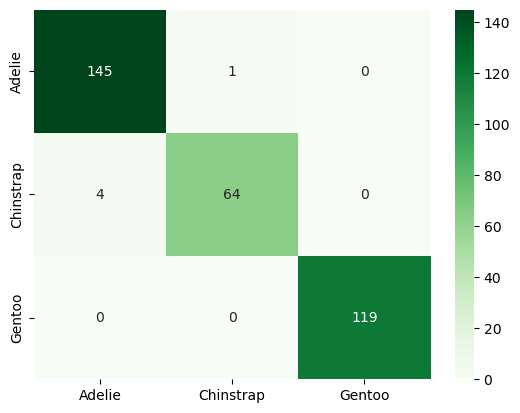

In [29]:
#Configuração de Gráfico
lbl1_cross = ['Adelie', 'Chinstrap', 'Gentoo']
lbl2_cross = ['Adelie', 'Chinstrap', 'Gentoo']
sns.heatmap(matriz_confusao_padr, annot=True, fmt='d', cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

In [30]:
padr_report = classification_report(y, y_pred_pad, output_dict=True)
df_padr_report = pd.DataFrame(padr_report)
df_padr_report

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.973154,0.984615,1.0,0.984985,0.985923,0.985088
recall,0.993151,0.941176,1.0,0.984985,0.978109,0.984985
f1-score,0.983051,0.962406,1.0,0.984985,0.981819,0.984892
support,146.000000,68.000000,119.0,0.984985,333.000000,333.000000


### Houldout após a Padronização

In [31]:
#Distribuindo ás variaveis os dados de treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=28)       #30% dos dados serão destinados a testes e a matriz de aleatoriedade é 28

In [32]:
knn_houldout = KNeighborsClassifier(n_neighbors=3)
knn_houldout.fit(x_train, y_train)      #treinando o KNN

KNeighborsClassifier(n_neighbors=3)

In [33]:
y_pred_houldout = knn_houldout.predict(x_test)      #fazendo a classificação após o modelo ser treinado com os dados de treino X

<Axes: >

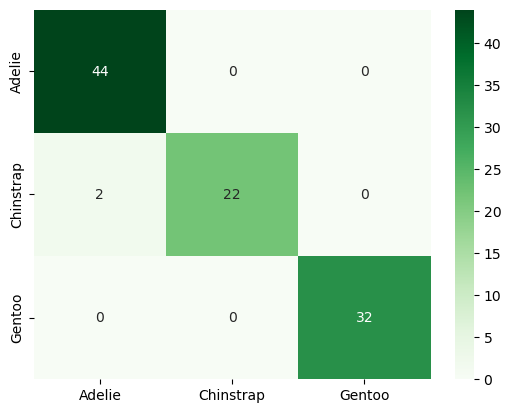

In [34]:
#Matriz de confusão
conf_matrix_houldout = confusion_matrix(y_test, y_pred_houldout)
sns.heatmap(conf_matrix_houldout, annot=True, fmt='d', cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

In [35]:
#Configuração da Matriz de Confusão de Métricas com o Houldout após a padronização
report = classification_report(y_test, y_pred_houldout, output_dict=True)
df_report = pd.DataFrame(report)
df_report

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.956522,1.000000,1.0,0.98,0.985507,0.980870
recall,1.000000,0.916667,1.0,0.98,0.972222,0.980000
f1-score,0.977778,0.956522,1.0,0.98,0.978100,0.979787
support,44.000000,24.000000,32.0,0.98,100.000000,100.000000


# Aplicando o KNN com Houldout para um DataFrame maior.

### Conseguimos boas acurácias depois que padronizamos os valores, por isso, vamos testar como nosso modelo se saí classificando um DataFrame MAIOR.

In [36]:
df_penguins_extended = pd.read_csv('data\palmerpenguins_extended.csv')
df_penguins_extended

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,diet,life_stage,health_metrics,year
0,Adelie,Biscoe,53.4,17.8,219.0,5687.0,female,fish,adult,overweight,2021
1,Adelie,Biscoe,49.3,18.1,245.0,6811.0,female,fish,adult,overweight,2021
2,Adelie,Biscoe,55.7,16.6,226.0,5388.0,female,fish,adult,overweight,2021
3,Adelie,Biscoe,38.0,15.6,221.0,6262.0,female,fish,adult,overweight,2021
4,Adelie,Biscoe,60.7,17.9,177.0,4811.0,female,fish,juvenile,overweight,2021
...,...,...,...,...,...,...,...,...,...,...,...
3425,Gentoo,Biscoe,44.0,20.4,252.0,6447.0,male,squid,adult,healthy,2025
3426,Gentoo,Biscoe,54.5,25.2,245.0,6872.0,male,squid,adult,healthy,2025
3427,Gentoo,Biscoe,51.4,20.4,258.0,7409.0,male,squid,adult,overweight,2025
3428,Gentoo,Biscoe,55.9,20.5,247.0,6491.0,male,squid,adult,healthy,2025


> #### Ao contrário do outro DataFrame, que continha apenas 333 objetos, nosso DataFrame agora possuí 3430 objetos.

Configurando o DataFrame

In [37]:
#Padronizando as colunas e atribuindo-as em uma variável
colunas_padronizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

df_extended_padronizado = pd.DataFrame(StandardScaler().fit_transform(df_penguins_extended[colunas_padronizar]), columns=colunas_padronizar)

#Atribuindo ás variáveis os valores padronizados
y = df_penguins_extended['species']
x = df_extended_padronizado[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

df_extended_padronizado['species'] = y
df_extended_padronizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3430 entries, 0 to 3429
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     3430 non-null   float64
 1   bill_depth_mm      3430 non-null   float64
 2   flipper_length_mm  3430 non-null   float64
 3   body_mass_g        3430 non-null   float64
 4   species            3430 non-null   object 
dtypes: float64(4), object(1)
memory usage: 134.1+ KB


Fazendo a Predição

<Axes: >

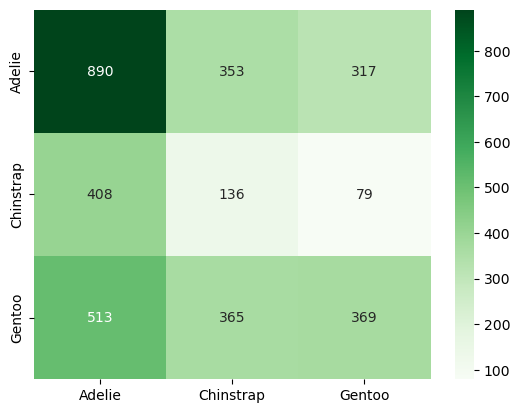

In [38]:
y_pred_houldout = knn_houldout.predict(x)

conf_matrix_houldout = confusion_matrix(y, y_pred_houldout)
sns.heatmap(conf_matrix_houldout, annot=True, fmt='d', cmap='Greens', xticklabels=lbl1_cross,yticklabels=lbl2_cross)

In [39]:
#Configuração da Matriz de Confusão de Métricas com o Houldout após a padronização
report = classification_report(y, y_pred_houldout, output_dict=True)
df_report = pd.DataFrame(report)
df_report

,Adelie,Chinstrap,Gentoo,accuracy,macro avg,weighted avg
precision,0.491441,0.159251,0.482353,0.406706,0.377682,0.427800
recall,0.570513,0.218299,0.295910,0.406706,0.361574,0.406706
f1-score,0.528033,0.184157,0.366799,0.406706,0.359663,0.406956
support,1560.000000,623.000000,1247.000000,0.406706,3430.000000,3430.000000


Percebemos que nosso modelo não se saiu muito bem com objetos novos para fazer a predição. Podemos então chegar a conclusão de que nosso modelo pode estar em um estado de Overfiting, onde o modelo se encaixou muito bem com os dados de treino, mas com dados novos ele não se saiu tão bem.